In [2]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [3]:
dataframe_df2 = pd.read_pickle("pickle_files/DataFrame_df2.pkl")
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]",[[-7.99325051e-18 -1.35384926e-17 2.90441583e...
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [7.65128701e-17 2.06980071e+00..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],[[-1.10578213e-16 1.10578213e-16 9.56970000e...
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [4]:
dataframe_df2.columns

Index(['uuid', 'structure', 'cell', 'volume',
       'relevant_dimension_of_highest_dimensionality_substructure',
       'binding_energy_per_substructure', 'binding_energy', 'label',
       'number_of_atoms_in_bulk',
       'number_of_highest_dimensionality_substructures_in_bulk',
       'sub_structure_spg', 'sub_structure_dim', 'energy_bulk',
       'sub_structure_formula', 'PMG Structure from ASE Atoms'],
      dtype='object')

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
from matminer.datasets import load_dataset
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.composition import ElementProperty, Stoichiometry, ValenceOrbital, IonProperty
from matminer.featurizers.structure import (SiteStatsFingerprint, StructuralHeterogeneity,
                                            ChemicalOrdering, StructureComposition, MaximumPackingEfficiency)
from matminer.featurizers.conversions import DictToObject
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats
from tqdm import tqdm_notebook as tqdm
import numpy as np

/home/mvahdat/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
df = pd.read_pickle("./pickle_files/features_MultipleFeaturizer.pkl")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.777778,64.0,0.130435,0.217391,0.652174,0.000000,1.0,0.209607,0.046579,EE
1,6.000000,10.432235,4.432235,8.954823,1.969882,0.101871,1.076403,0.847193,1.119514e-11,0.171207,...,73.333333,64.0,0.272727,0.454545,0.272727,0.000000,1.0,0.357395,0.079421,EE
2,9.052693,11.479272,2.426579,9.749345,0.864963,0.020033,1.032994,0.959935,2.631480e-02,0.125121,...,15.750000,152.0,0.129032,0.193548,0.483871,0.193548,0.0,0.168813,0.031652,EE
3,10.187778,12.638871,2.451093,11.821840,1.089375,0.050764,1.038073,0.923854,4.593043e-02,0.102799,...,28.000000,229.0,0.200000,0.000000,0.333333,0.466667,0.0,0.265103,0.058912,PE
4,9.198422,14.426225,5.227803,11.335849,2.060251,0.087363,1.131045,0.914155,9.864448e-02,0.120736,...,65.555556,64.0,0.250000,0.250000,0.500000,0.000000,1.0,0.543070,0.104828,EE


In [7]:
features_with_small_contribution = [0, 1, 2, 3, 4, 5, 6,7, 8, 9,10,11,12,13, 128, 129,130,131,132,133,134,135,
                         136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,
                         155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,
                         174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,
                         193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,
                         212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,
                         231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,
                         250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,
                         269,270,271,272]

In [8]:
df = df.drop(features_with_small_contribution, axis = 1)
df.head()

,14,15,16,17,18,19,20,21,22,23,...,119,120,121,122,123,124,125,126,127,label
0,NaN,NaN,NaN,0.392697,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EE
1,0.353008,0.080997,0.067582,0.376482,3.618051,9.000000,5.381949,5.412034,2.391977,15.678221,...,2.110663,1.262164,1.26922,0.560962,66.330933,165.000000,98.669067,99.220622,43.852919,EE
2,0.500257,0.185244,0.066168,0.530390,2.526145,15.672277,13.146132,7.532116,5.001544,8.683625,...,0.000000,0.000000,0.00000,0.000000,6.631132,41.139728,34.508596,19.771803,13.129053,EE
3,0.225317,0.059013,0.052994,0.531858,9.055929,21.098280,12.042350,13.070046,5.352156,23.394484,...,0.000000,0.000000,0.00000,0.000000,23.771815,55.382985,31.611170,34.308871,14.049409,PE
4,0.416765,0.181752,0.128570,0.503722,12.897617,43.880729,30.983112,27.614702,10.844018,40.347793,...,0.000000,0.000000,0.00000,0.000000,57.948223,107.335599,49.387376,89.654894,21.137781,EE


***Let train in a binary case: EE and HBE***

In [9]:
df_binary = df.dropna()

In [10]:
df_binary['label'].replace(to_replace='PE', value='EE', inplace=True)
df_binary['label'].replace(to_replace='EE', value=1, inplace=True)
df_binary['label'].replace(to_replace='HBE', value=0, inplace=True)

In [11]:
df_binary.head()

,14,15,16,17,18,19,20,21,22,23,...,119,120,121,122,123,124,125,126,127,label
1,0.353008,0.080997,0.067582,0.376482,3.618051,9.000000,5.381949,5.412034,2.391977,15.678221,...,2.110663,1.262164,1.26922,0.560962,66.330933,165.000000,98.669067,99.220622,43.852919,1
2,0.500257,0.185244,0.066168,0.530390,2.526145,15.672277,13.146132,7.532116,5.001544,8.683625,...,0.000000,0.000000,0.00000,0.000000,6.631132,41.139728,34.508596,19.771803,13.129053,1
3,0.225317,0.059013,0.052994,0.531858,9.055929,21.098280,12.042350,13.070046,5.352156,23.394484,...,0.000000,0.000000,0.00000,0.000000,23.771815,55.382985,31.611170,34.308871,14.049409,1
4,0.416765,0.181752,0.128570,0.503722,12.897617,43.880729,30.983112,27.614702,10.844018,40.347793,...,0.000000,0.000000,0.00000,0.000000,57.948223,107.335599,49.387376,89.654894,21.137781,1
5,0.476906,0.206932,0.109132,0.204110,19.080017,74.209136,55.129119,29.244639,12.846999,0.989455,...,0.000000,0.000000,0.00000,0.000000,0.000000,213.000000,213.000000,81.135835,56.513213,1


In [65]:
X = df_binary.drop('label', axis = 1).values
y = df_binary['label'].values

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Neural Network***

In [341]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [342]:
X.shape

(2213, 114)

In [351]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [782]:
model = Sequential()
model.add(Dense(units=114,activation='relu'))

model.add(Dense(units=128,activation='relu'))

#model.add(Dense(units=256,activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(units=128,activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(units=128,activation='relu'))

# model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))


# model.add(Dense(units=32,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [783]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
#           batch_size=64,
          callbacks=[early_stop]
          )

Epoch 1/600
49/49 [==============================] - 1s 11ms/step - loss: 14.9812 - val_loss: 1.6357
Epoch 2/600
49/49 [==============================] - 0s 6ms/step - loss: 2.5139 - val_loss: 0.7333
Epoch 3/600
49/49 [==============================] - 0s 6ms/step - loss: 1.1476 - val_loss: 0.5953
Epoch 4/600
49/49 [==============================] - 0s 7ms/step - loss: 1.0630 - val_loss: 0.5937
Epoch 5/600
49/49 [==============================] - 0s 7ms/step - loss: 0.7673 - val_loss: 0.4789
Epoch 6/600
49/49 [==============================] - 0s 5ms/step - loss: 0.6462 - val_loss: 0.4781
Epoch 7/600
49/49 [==============================] - 0s 8ms/step - loss: 0.6025 - val_loss: 0.4414
Epoch 8/600
49/49 [==============================] - 0s 6ms/step - loss: 0.5519 - val_loss: 0.4363
Epoch 9/600
49/49 [==============================] - 0s 7ms/step - loss: 0.5257 - val_loss: 0.5163
Epoch 10/600
49/49 [==============================] - 0s 5ms/step - loss: 0.5318 - val_loss: 0.4510
Epoch 1

<AxesSubplot:>

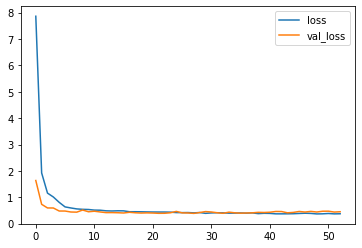

In [784]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [785]:
predictions = model.predict(X_test)

In [786]:
predictions = predictions.reshape(len(y_test))
predictions.shape

(664,)

In [787]:
pred = [round(i) for i in predictions]

In [788]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.32      0.47       139
           1       0.85      0.98      0.91       525

    accuracy                           0.85       664
   macro avg       0.85      0.65      0.69       664
weighted avg       0.85      0.85      0.82       664



[[ 45  94]
 [  8 517]]


In [260]:
model = Sequential()
model.add(Dense(units=114,activation='relu'))

model.add(Dense(units=256,activation='relu'))

#model.add(Dense(units=256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))

# model.add(Dense(units=64,activation='relu'))
# model.add(Dropout(0.1))


model.add(Dense(units=32,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [780]:
model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model/assets


In [781]:
model = tf.keras.models.load_model('seq_model')

In [190]:
num_layers = 5


learning_rates = [0.001, 0.0001, 0.00001]

num_layer: 1 num_neuron 512
Epoch 00041: early stopping
num_layer: 1 num_neuron 512
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_337 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_338 (Dense)            (None, 512)               58880     
_________________________________________________________________
dense_339 (Dense)            (None, 1)                 513       
Total params: 72,503
Trainable params: 72,503
Non-trainable params: 0
_________________________________________________________________
None


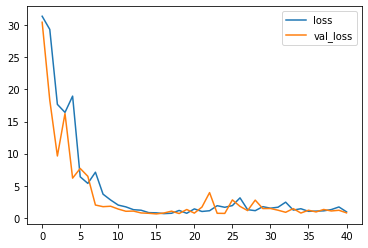

              precision    recall  f1-score   support

           0       0.70      0.32      0.44       139
           1       0.84      0.96      0.90       525

    accuracy                           0.83       664
   macro avg       0.77      0.64      0.67       664
weighted avg       0.81      0.83      0.80       664



[[ 44  95]
 [ 19 506]]
num_layer: 1 num_neuron 256
Epoch 00069: early stopping
num_layer: 1 num_neuron 256
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_341 (Dense)            (None, 256)               29440     
_________________________________________________________________
dense_342 (Dense)            (None, 1)                 257       
Total params: 42,807
Trainable params: 42,807
Non-trainable params: 0
_________

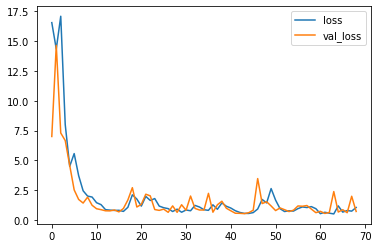

              precision    recall  f1-score   support

           0       0.74      0.32      0.45       139
           1       0.84      0.97      0.90       525

    accuracy                           0.83       664
   macro avg       0.79      0.65      0.68       664
weighted avg       0.82      0.83      0.81       664



[[ 45  94]
 [ 16 509]]
num_layer: 1 num_neuron 128
Epoch 00098: early stopping
num_layer: 1 num_neuron 128
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_343 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_344 (Dense)            (None, 128)               14720     
_________________________________________________________________
dense_345 (Dense)            (None, 1)                 129       
Total params: 27,959
Trainable params: 27,959
Non-trainable params: 0
_________

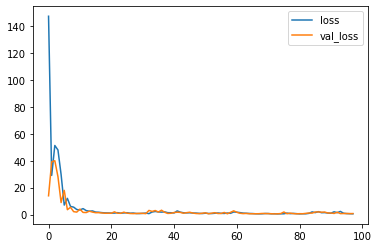

              precision    recall  f1-score   support

           0       0.41      0.56      0.48       139
           1       0.87      0.79      0.83       525

    accuracy                           0.74       664
   macro avg       0.64      0.68      0.65       664
weighted avg       0.78      0.74      0.76       664



[[ 78  61]
 [110 415]]
num_layer: 2 num_neuron 512
Epoch 00085: early stopping
num_layer: 2 num_neuron 512
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_346 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_347 (Dense)            (None, 512)               58880     
_________________________________________________________________
dense_348 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_349 (De

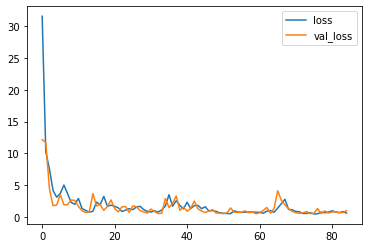

              precision    recall  f1-score   support

           0       0.86      0.13      0.23       139
           1       0.81      0.99      0.89       525

    accuracy                           0.81       664
   macro avg       0.83      0.56      0.56       664
weighted avg       0.82      0.81      0.75       664



[[ 18 121]
 [  3 522]]
num_layer: 2 num_neuron 256
Epoch 00084: early stopping
num_layer: 2 num_neuron 256
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_350 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_351 (Dense)            (None, 256)               29440     
_________________________________________________________________
dense_352 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_353 (De

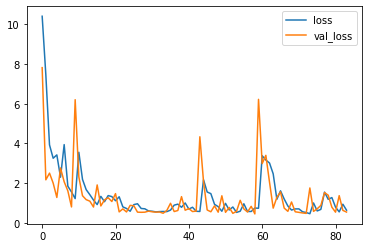

              precision    recall  f1-score   support

           0       0.50      0.57      0.53       139
           1       0.88      0.85      0.86       525

    accuracy                           0.79       664
   macro avg       0.69      0.71      0.70       664
weighted avg       0.80      0.79      0.79       664



[[ 79  60]
 [ 80 445]]
num_layer: 2 num_neuron 128
Epoch 00158: early stopping
num_layer: 2 num_neuron 128
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_354 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_355 (Dense)            (None, 128)               14720     
_________________________________________________________________
dense_356 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_357 (De

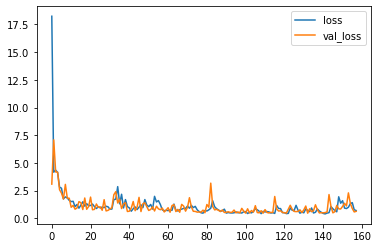

              precision    recall  f1-score   support

           0       0.61      0.37      0.46       139
           1       0.85      0.94      0.89       525

    accuracy                           0.82       664
   macro avg       0.73      0.66      0.68       664
weighted avg       0.80      0.82      0.80       664



[[ 52  87]
 [ 33 492]]
num_layer: 3 num_neuron 512
Epoch 00060: early stopping
num_layer: 3 num_neuron 512
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_358 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_359 (Dense)            (None, 512)               58880     
_________________________________________________________________
dense_360 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_361 (De

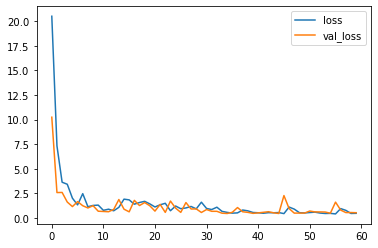

              precision    recall  f1-score   support

           0       0.43      0.58      0.49       139
           1       0.88      0.79      0.83       525

    accuracy                           0.75       664
   macro avg       0.65      0.69      0.66       664
weighted avg       0.78      0.75      0.76       664



[[ 81  58]
 [109 416]]
num_layer: 3 num_neuron 256
Epoch 00089: early stopping
num_layer: 3 num_neuron 256
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_363 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_364 (Dense)            (None, 256)               29440     
_________________________________________________________________
dense_365 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_366 (De

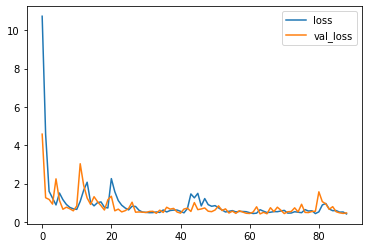

              precision    recall  f1-score   support

           0       0.80      0.32      0.45       139
           1       0.84      0.98      0.91       525

    accuracy                           0.84       664
   macro avg       0.82      0.65      0.68       664
weighted avg       0.83      0.84      0.81       664



[[ 44  95]
 [ 11 514]]
num_layer: 3 num_neuron 128
Epoch 00092: early stopping
num_layer: 3 num_neuron 128
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_368 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_369 (Dense)            (None, 128)               14720     
_________________________________________________________________
dense_370 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_371 (De

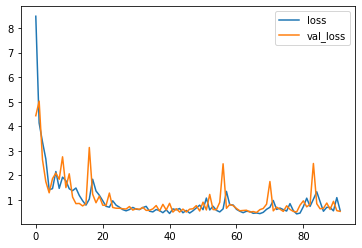

              precision    recall  f1-score   support

           0       0.53      0.46      0.49       139
           1       0.86      0.89      0.88       525

    accuracy                           0.80       664
   macro avg       0.70      0.68      0.69       664
weighted avg       0.79      0.80      0.80       664



[[ 64  75]
 [ 56 469]]
num_layer: 4 num_neuron 512
Epoch 00075: early stopping
num_layer: 4 num_neuron 512
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_373 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_374 (Dense)            (None, 512)               58880     
_________________________________________________________________
dense_375 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_376 (De

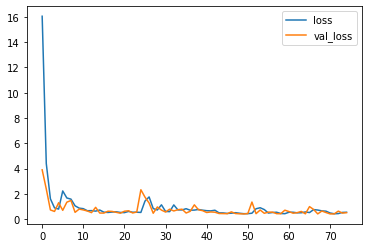

              precision    recall  f1-score   support

           0       0.82      0.13      0.22       139
           1       0.81      0.99      0.89       525

    accuracy                           0.81       664
   macro avg       0.81      0.56      0.56       664
weighted avg       0.81      0.81      0.75       664



[[ 18 121]
 [  4 521]]
num_layer: 4 num_neuron 256
num_layer: 4 num_neuron 256
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_379 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_380 (Dense)            (None, 256)               29440     
_________________________________________________________________
dense_381 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_382 (Dense)            (None, 16)  

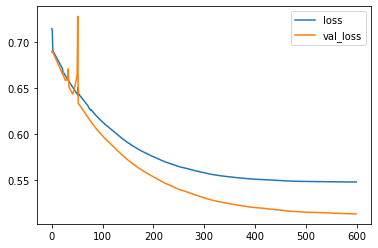

/home/mvahdat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.79      1.00      0.88       525

    accuracy                           0.79       664
   macro avg       0.40      0.50      0.44       664
weighted avg       0.63      0.79      0.70       664



[[  0 139]
 [  0 525]]
num_layer: 4 num_neuron 128
Epoch 00257: early stopping
num_layer: 4 num_neuron 128
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_386 (Dense)            (None, 128)               14720     
_________________________________________________________________
dense_387 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_388 (De

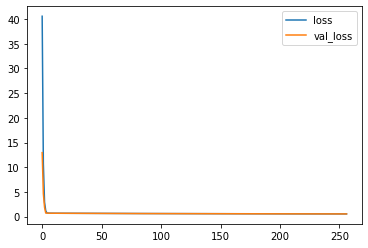

              precision    recall  f1-score   support

           0       0.75      0.06      0.12       139
           1       0.80      0.99      0.89       525

    accuracy                           0.80       664
   macro avg       0.78      0.53      0.50       664
weighted avg       0.79      0.80      0.73       664



[[  9 130]
 [  3 522]]
num_layer: 5 num_neuron 512
Epoch 00063: early stopping
num_layer: 5 num_neuron 512
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_391 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_392 (Dense)            (None, 512)               58880     
_________________________________________________________________
dense_393 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_394 (De

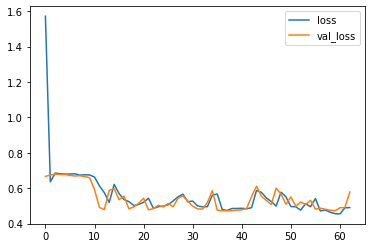

/home/mvahdat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.79      1.00      0.88       525

    accuracy                           0.79       664
   macro avg       0.40      0.50      0.44       664
weighted avg       0.63      0.79      0.70       664



[[  0 139]
 [  0 525]]
num_layer: 5 num_neuron 256
num_layer: 5 num_neuron 256
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_398 (Dense)            (None, 114)               13110     
_________________________________________________________________
dense_399 (Dense)            (None, 256)               29440     
_________________________________________________________________
dense_400 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_401 (Dense)            (None, 16)  

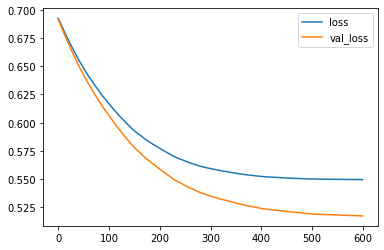

/home/mvahdat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.79      1.00      0.88       525

    accuracy                           0.79       664
   macro avg       0.40      0.50      0.44       664
weighted avg       0.63      0.79      0.70       664



[[  0 139]
 [  0 525]]
num_layer: 5 num_neuron 128


In [ ]:


for num_layer in range(1,num_layers+1):
#         for learning_rate in learning_rates:
    for num_neuron in [512, 256, 128]:
            print('num_layer:', num_layer, 'num_neuron', num_neuron)
            model = Sequential()
            model.add(Dense(114,activation='relu'))
            num = 0
            while num < num_layer:
                    model.add(Dense(num_neuron / (4**num),activation='relu'))
                    num += 1
            model.add(Dense(units=1,activation='sigmoid'))
            
#             optimizer = Adam(lr=learning_rate)
            
            # For a binary classification problem
            model.compile(loss='binary_crossentropy', optimizer='adam')
            

            model.fit(x=X_train,y=y_train,
              validation_data=(X_test,y_test),
              batch_size=512,epochs=600,
              callbacks=[early_stop],
              verbose=0
             )


            print('num_layer:', num_layer, 'num_neuron', num_neuron)
            print(model.summary())

            losses = pd.DataFrame(model.history.history)
            losses.plot()
            plt.show()

            
            predictions = model.predict(X_test)
            predictions = predictions.reshape(len(y_test))
            pred = [round(i) for i in predictions]

            print(classification_report(y_test, pred))
            print("\n")
            print(confusion_matrix(y_test, pred))

